# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [1]:
import pandas as pd
import zipfile
from datetime import datetime

### Load Data

In [2]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [3]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False


In [4]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,mZa9ls,0,23,True
1,mZa9ls,0,24,True
2,mZa9ls,0,25,True
3,mZa9ls,0,26,True
4,mZa9ls,0,27,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [5]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

In [126]:
list_sample_train

[        WaferName  DieX  DieY  IsGoodDie  IsScratchDie
 7557906    KQWkdW     0    23       True         False
 7557907    KQWkdW     0    24       True         False
 7557908    KQWkdW     0    25       True         False
 7557909    KQWkdW     0    26       True         False
 7557910    KQWkdW     0    27       True         False
 ...           ...   ...   ...        ...           ...
 7560898    KQWkdW    60    33       True         False
 7560899    KQWkdW    60    34       True         False
 7560900    KQWkdW    60    35       True         False
 7560901    KQWkdW    60    36       True         False
 7560902    KQWkdW    60    37       True         False
 
 [2997 rows x 5 columns],
          WaferName  DieX  DieY  IsGoodDie  IsScratchDie
 10145250    cp5x0M     0    18       True         False
 10145251    cp5x0M     0    19       True         False
 10145252    cp5x0M     0    20       True         False
 10145253    cp5x0M     0    21       True         False
 10145254    cp

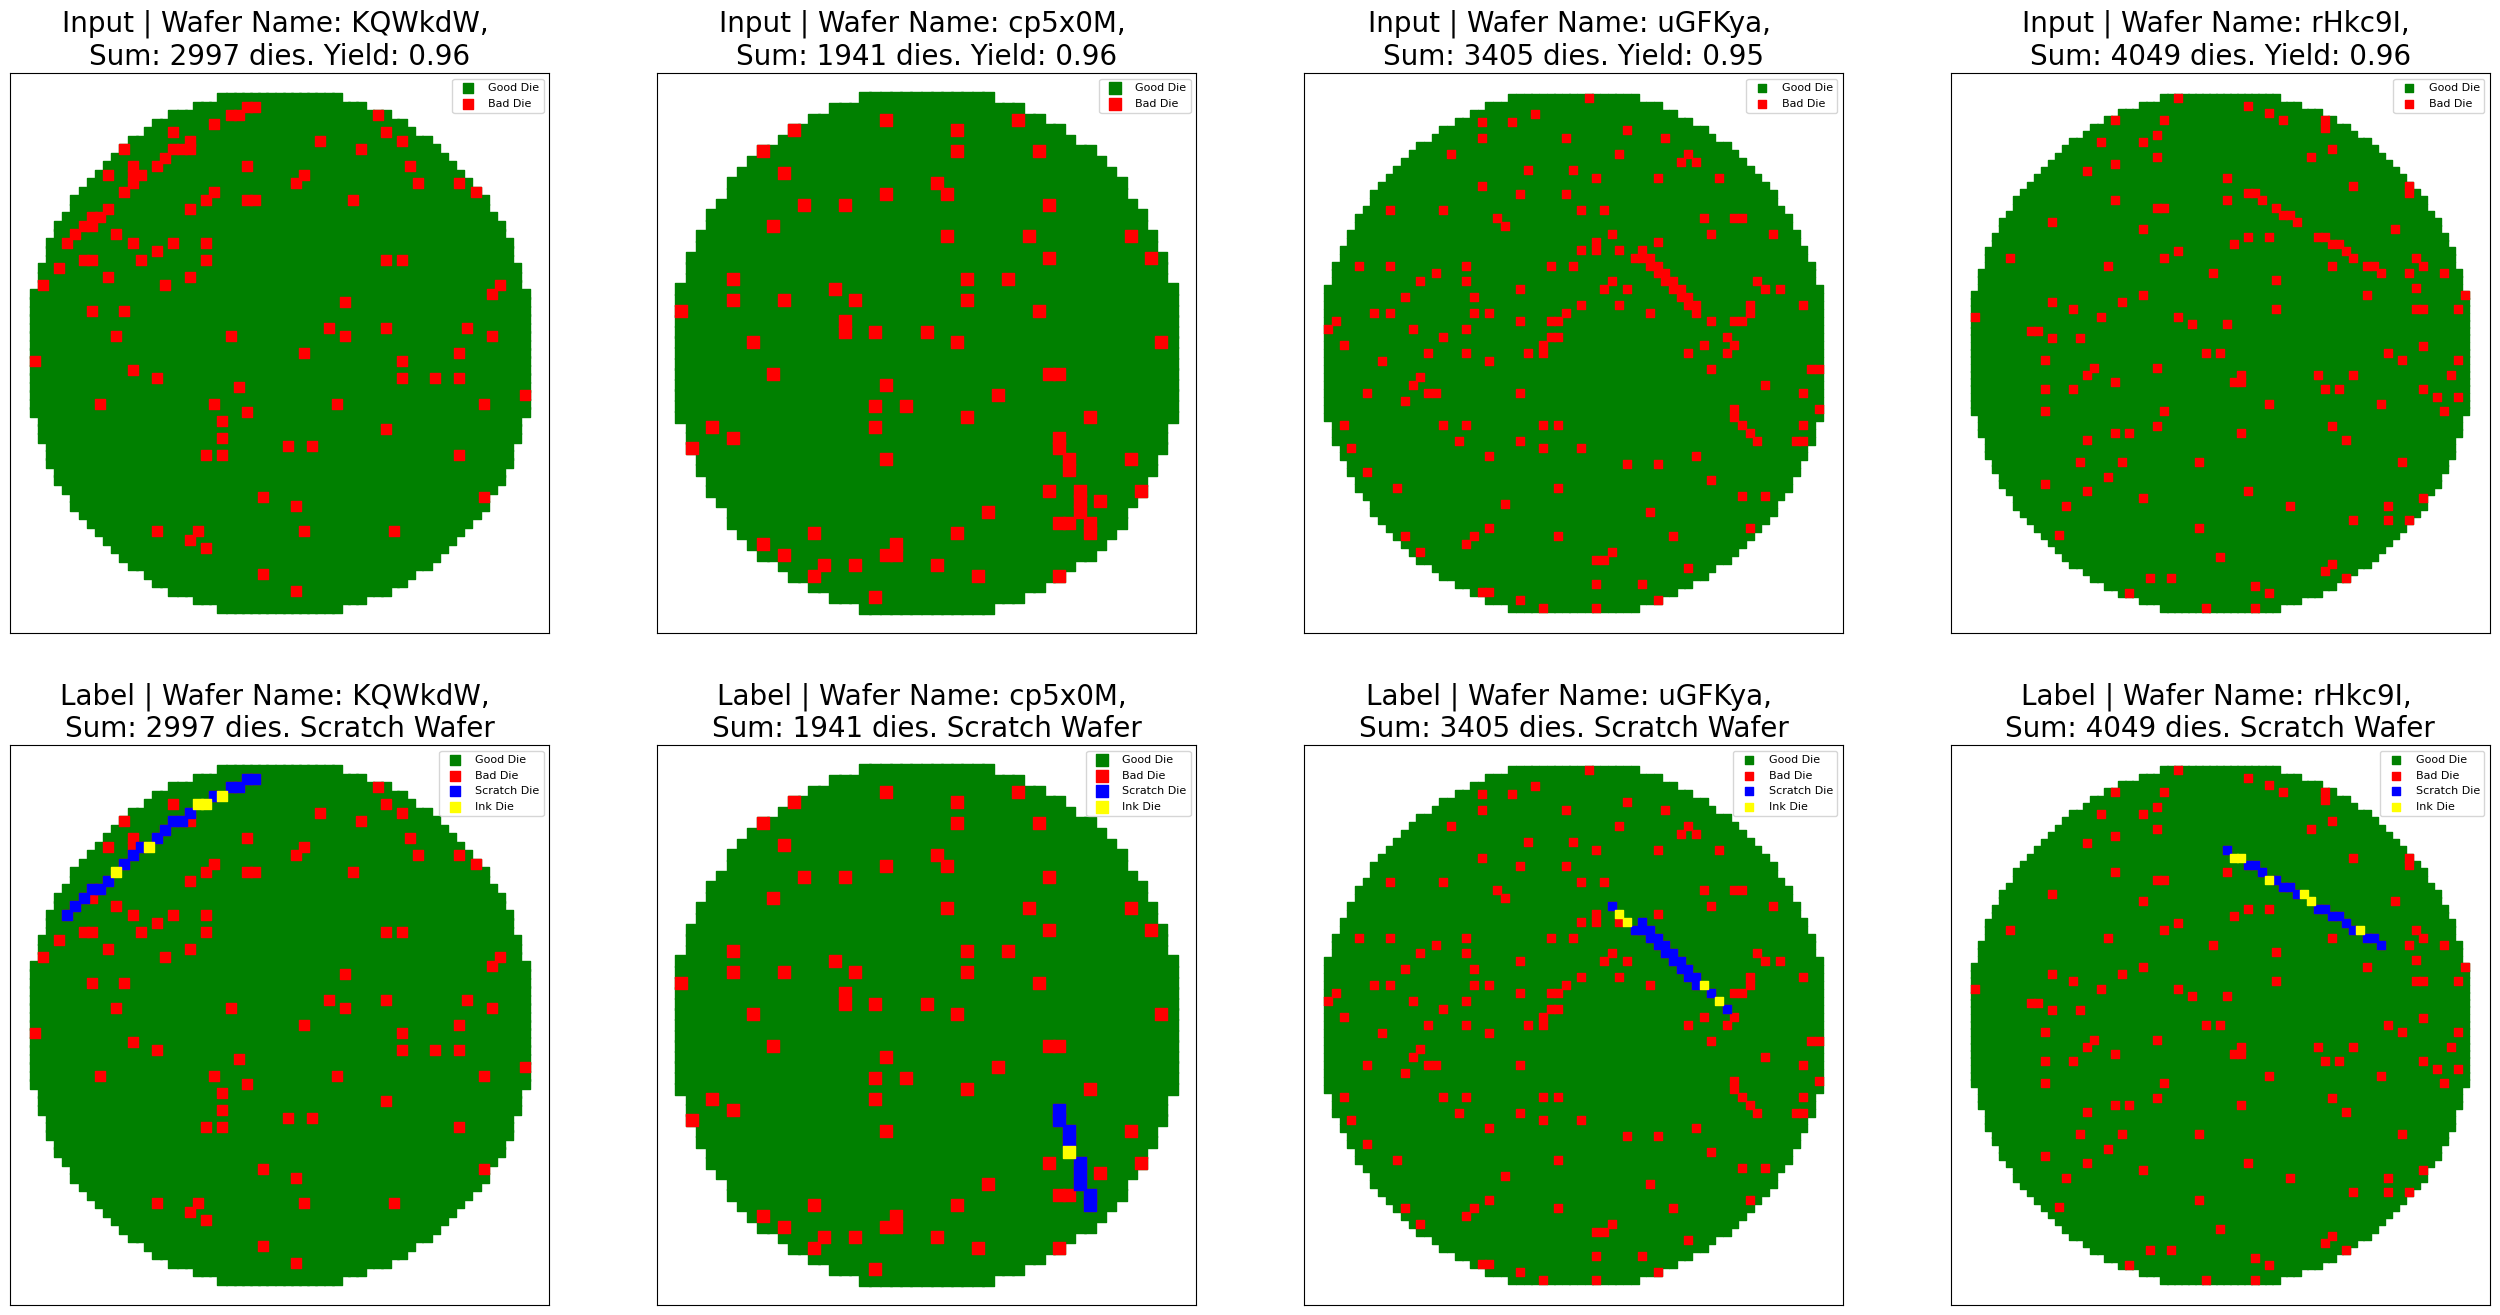

In [6]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

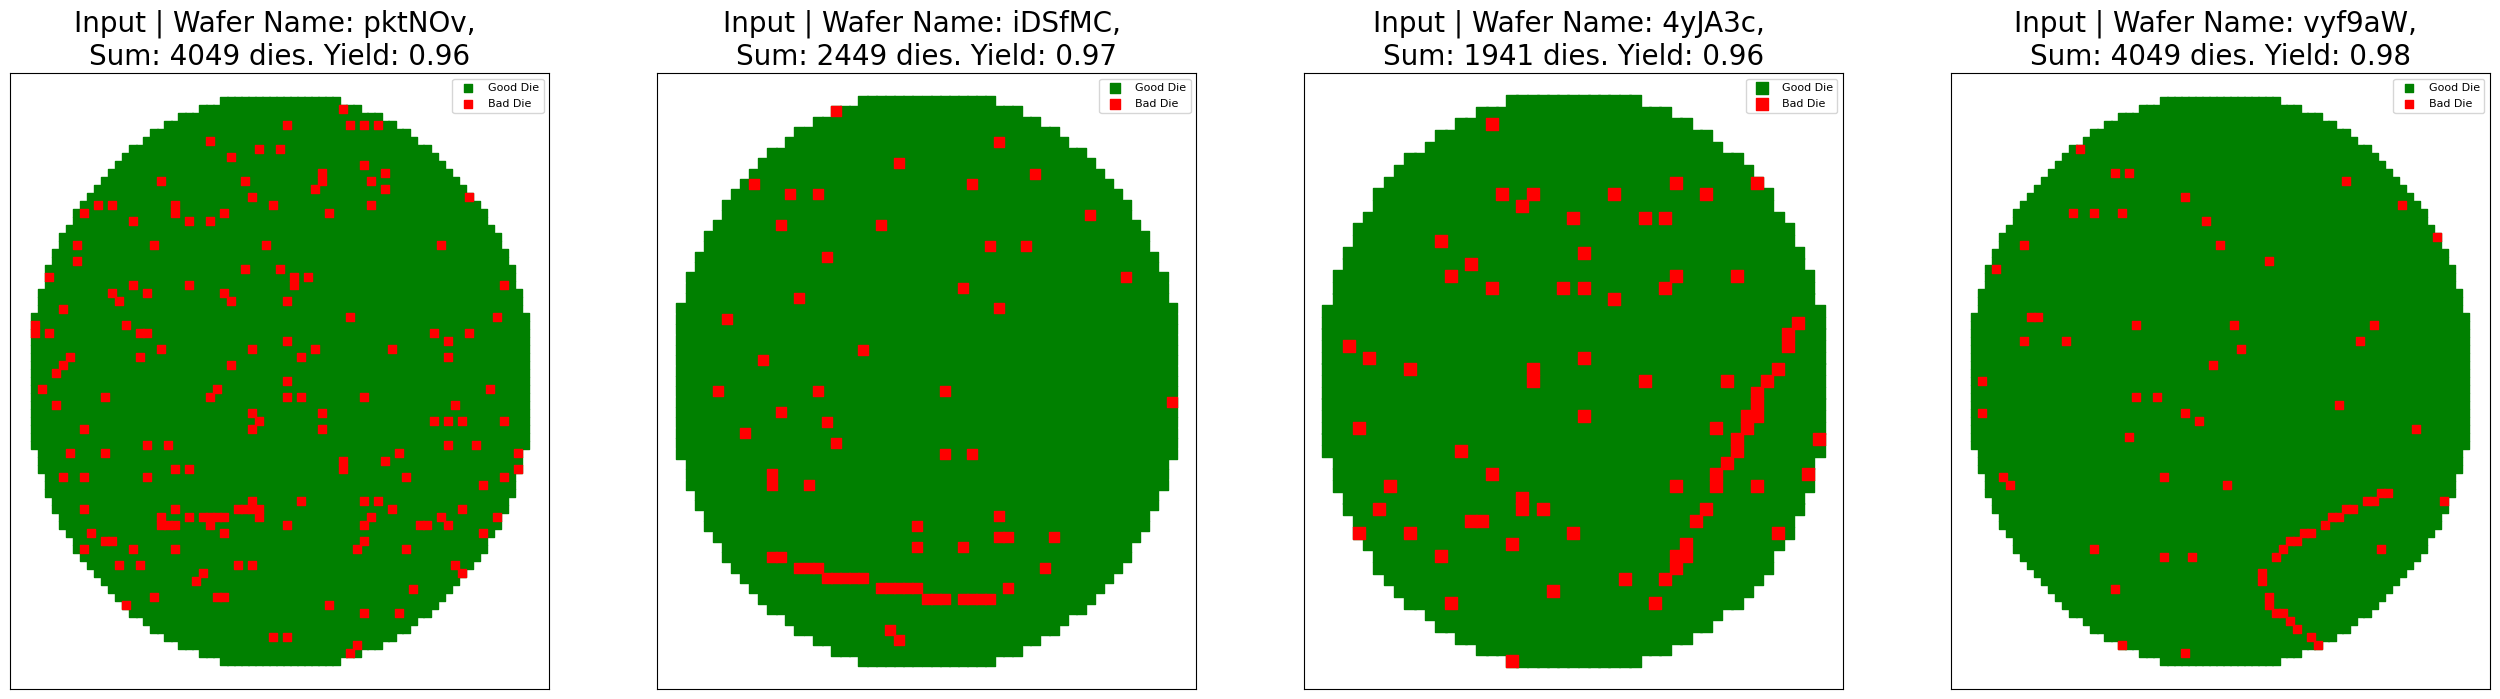

In [7]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

## EDA

In [ ]:
# How many wafers are there in the train and test set?
print(f'Train set: {len(df_wafers["WaferName"].unique())} wafers')
print(f'Test set: {len(df_wafers_test["WaferName"].unique())} wafers')
# How many dies are there in the train and test set?
print(f'Total: {len(df_wafers["WaferName"].unique()) + len(df_wafers_test["WaferName"].unique())} wafers')

Train set: 4200 wafers
Test set: 455 wafers
Total: 4655 wafers


In [10]:
# Are there any missing values in the train and test set?
print(f'Train set: {df_wafers.isnull().sum().sum()} missing values')   
print(f'Test set: {df_wafers_test.isnull().sum().sum()} missing values')

Train set: 0 missing values
Test set: 0 missing values


In [50]:
# In how many unique wafers are the scratch dies located?
print(f'Train set: {df_wafers[df_wafers["IsScratchDie"] == True]["WaferName"].nunique()} wafers with scratch dies')

Train set: 4073 wafers with scratch dies


In [14]:
# Are there any duplicates in the train and test set?
print(f'Train set: {df_wafers.duplicated().sum()} duplicates')  
print(f'Test set: {df_wafers_test.duplicated().sum()} duplicates')
print("*"*35)
# How many good and bad dies are there in the train and test set?
print(f'Train set: {df_wafers["IsGoodDie"].value_counts()}')
print(f'Test set: {df_wafers_test["IsGoodDie"].value_counts()}')
print("*"*35)
# How many scratch and non-scratch dies are there in the train and test set?
print(f'Train set: {df_wafers["IsScratchDie"].value_counts()}')


Train set: 0 duplicates
Test set: 0 duplicates
***********************************
Train set: IsGoodDie
True     10036478
False      378922
Name: count, dtype: int64
Test set: IsGoodDie
True     1038877
False      89458
Name: count, dtype: int64
***********************************
Train set: IsScratchDie
False    10335081
True        80319
Name: count, dtype: int64


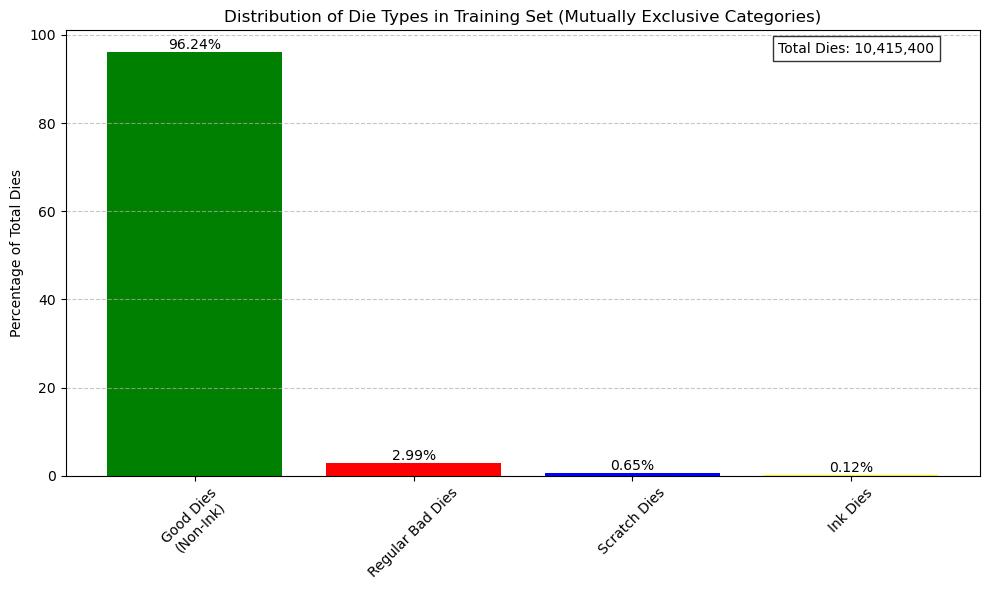

In [36]:
# Calculate all categories with corrected counting
total_dies = len(df_wafers)
good_dies_without_ink = ((df_wafers['IsGoodDie'] == True) & (df_wafers['IsScratchDie'] == False)).sum()
regular_bad_dies = ((df_wafers['IsGoodDie'] == False) & (df_wafers['IsScratchDie'] == False)).sum()
scratch_dies = ((df_wafers['IsGoodDie'] == False) & (df_wafers['IsScratchDie'] == True)).sum()
ink_dies = ((df_wafers['IsGoodDie'] == True) & (df_wafers['IsScratchDie'] == True)).sum()

# Create data for plotting
categories = ['Good Dies\n(Non-Ink)', 'Regular Bad Dies', 'Scratch Dies', 'Ink Dies']
values = [good_dies_without_ink, regular_bad_dies, scratch_dies, ink_dies]
percentages = [v/total_dies*100 for v in values]
colors = ['green', 'red', 'blue', 'yellow']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

# Customize the plot
plt.title('Distribution of Die Types in Training Set (Mutually Exclusive Categories)')
plt.ylabel('Percentage of Total Dies')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add total count as text
plt.text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
         transform=plt.gca().transAxes, 
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [180]:
# whats the avrege yield of the wafers?
df_wafers.groupby('WaferName')['IsGoodDie'].mean().describe()

count    4200.000000
mean        0.962850
std         0.011008
min         0.900198
25%         0.955084
50%         0.962963
75%         0.971166
max         0.989055
Name: IsGoodDie, dtype: float64

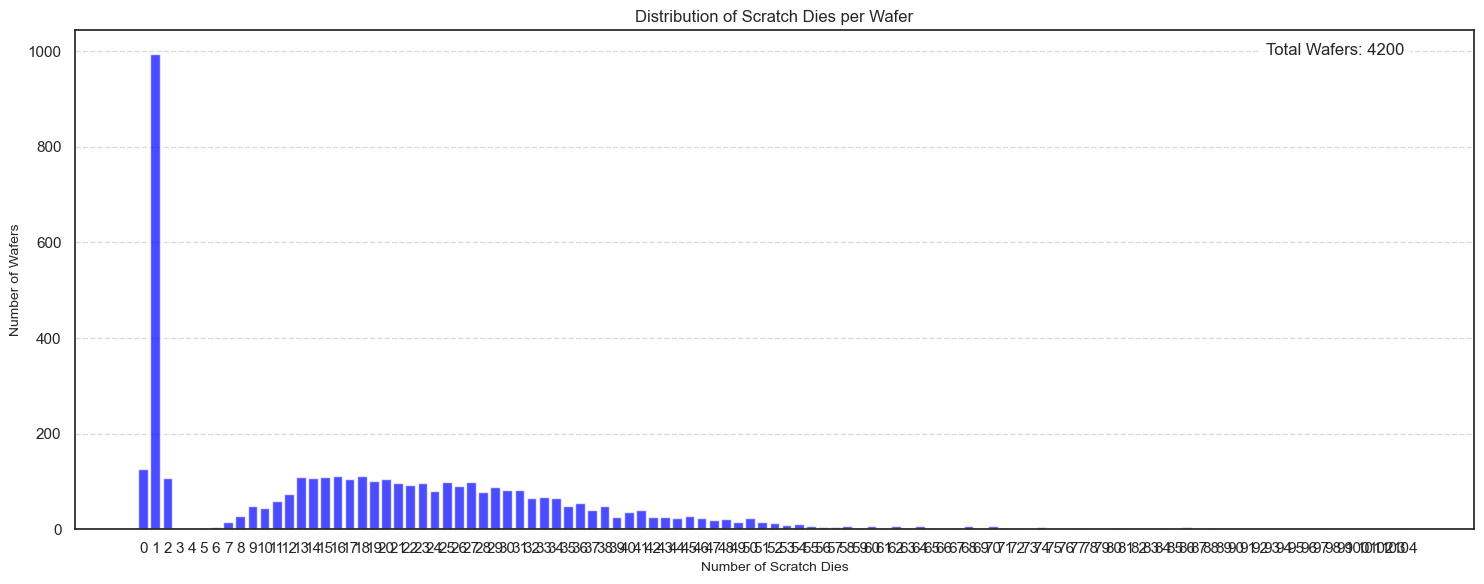


Scratch dies per wafer statistics:
count    4200.000000
mean       19.123571
std        16.216114
min         0.000000
25%         1.000000
50%        18.000000
75%        29.000000
max       104.000000
Name: IsScratchDie, dtype: float64


In [193]:
# Count scratch dies per wafer
scratch_counts = df_wafers.groupby('WaferName')['IsScratchDie'].sum()

# Create the histogram
plt.figure(figsize=(15, 6))
plt.hist(scratch_counts, bins=range(int(scratch_counts.max()) + 2), 
         align='left', rwidth=0.8, color='blue', alpha=0.7)

# Customize the plot
plt.title('Distribution of Scratch Dies per Wafer', fontsize=12)
plt.xlabel('Number of Scratch Dies', fontsize=10)
plt.ylabel('Number of Wafers', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis ticks to show every integer
plt.xticks(range(0, int(scratch_counts.max()) + 1))

# Add text showing total number of wafers
plt.text(0.95, 0.95, f'Total Wafers: {len(scratch_counts)}',
         transform=plt.gca().transAxes,
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print some statistics
print("\nScratch dies per wafer statistics:")
print(scratch_counts.describe())

this is highlty implanced problem ltaer when its time to chouse metrics  this should be taken into considartion

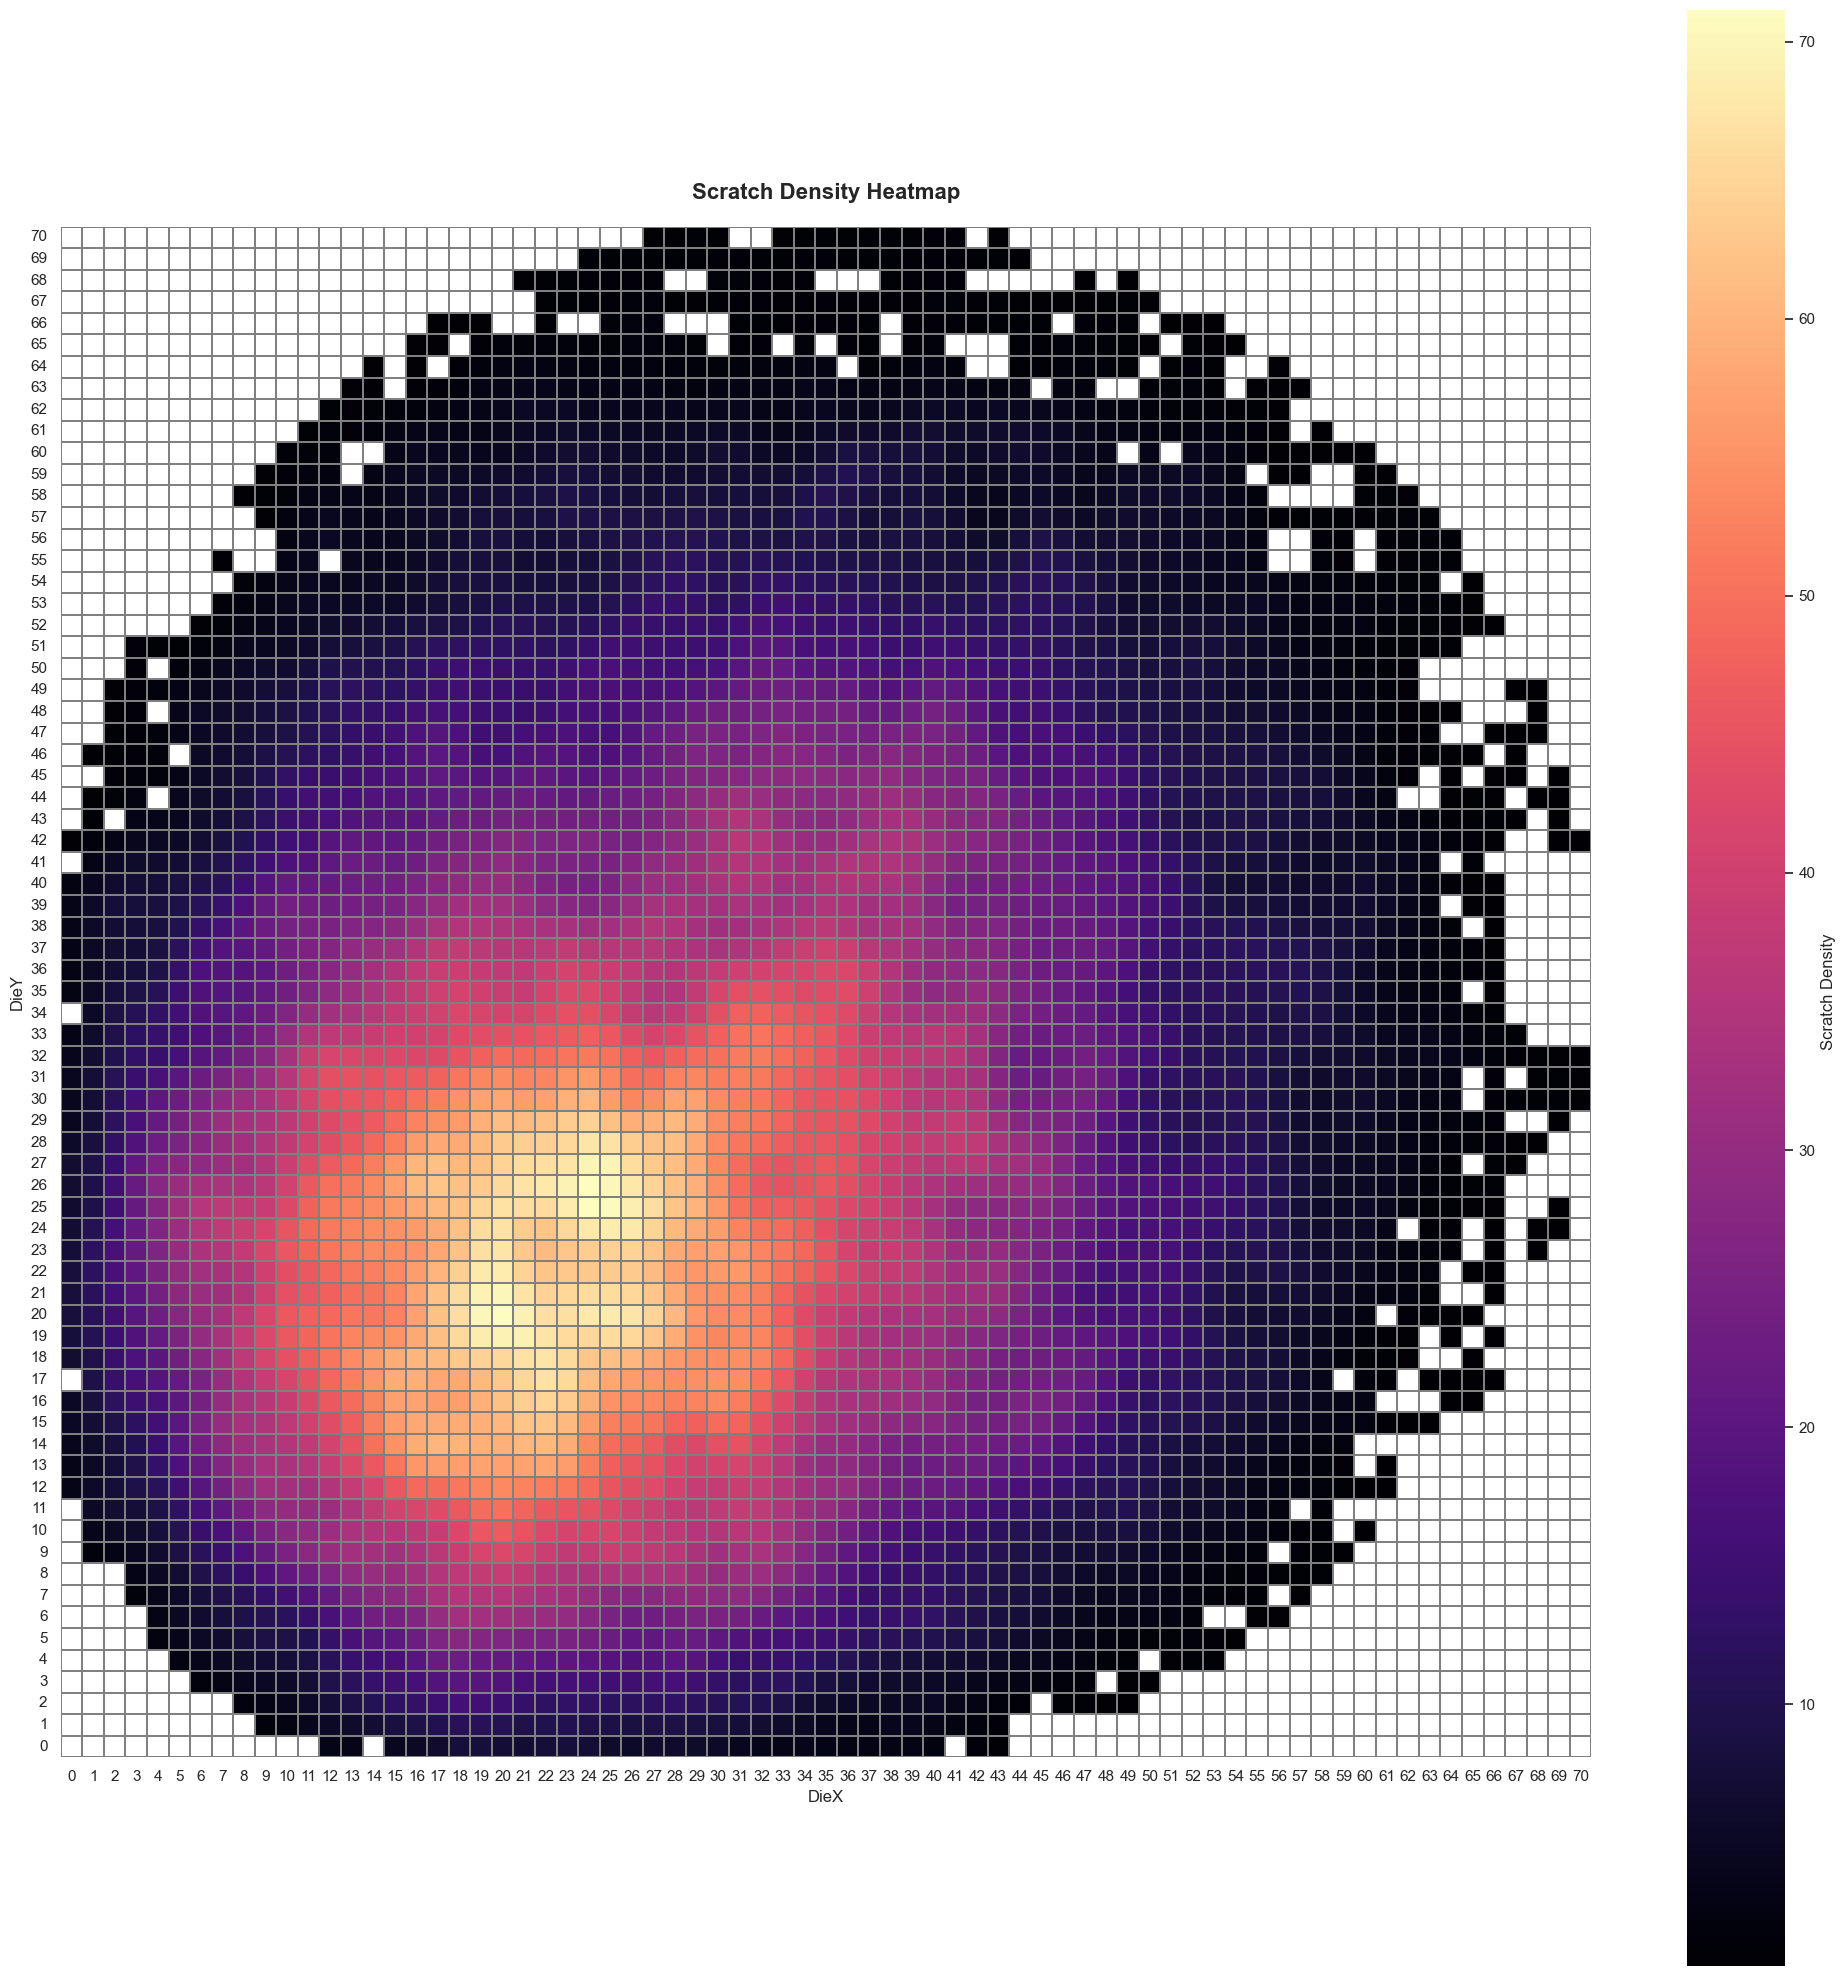

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

# Count scratches
scratch_counts = df_wafers[df_wafers['IsScratchDie']].groupby(['DieX', 'DieY']).size().reset_index(name='ScratchCount')
heatmap_data = scratch_counts.pivot(index='DieY', columns='DieX', values='ScratchCount').fillna(0)

# Smooth the data
blurred_data = gaussian_filter(heatmap_data, sigma=1)

# Mask zeros (will appear white)
mask = heatmap_data == 0

# Create a custom colormap that starts with white
original_cmap = sns.color_palette("magma", as_cmap=True)
colors = original_cmap(np.linspace(0, 1, 256))
colors[0] = np.array([1, 1, 1, 1])  # White for zero
custom_cmap = ListedColormap(colors)

# Plot
plt.figure(figsize=(20,20))
sns.set(style="white")

sns.heatmap(
    blurred_data,
    cmap=custom_cmap,
    mask=mask,
    linewidths=0.2,
    linecolor='gray',
    square=True,
    cbar_kws={'label': 'Scratch Density'},
    xticklabels=True,
    yticklabels=True
)

plt.title('Scratch Density Heatmap', fontsize=16, weight='bold', pad=20)
plt.xlabel('DieX', fontsize=12)
plt.ylabel('DieY', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


it looks like there is a higher consentration of scratches in a particular area of the wafer - this will be the base for our first model. 

In [84]:
df_wafers

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False
...,...,...,...,...,...
10415395,CofPVD,64,36,True,False
10415396,CofPVD,64,37,True,False
10415397,CofPVD,64,38,True,False
10415398,CofPVD,64,39,True,False


## First approach - XGBoost


In [111]:
# upsampling the minority class
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# cretae holdout set and train set so that the upsampled model canm be tesetd on the holdout set

df_wafers_to_up, df_holdout = train_test_split(df_wafers, test_size=0.2, random_state=42)

# Check the distribution of the target variable in the training set
print(df_wafers_to_up['IsScratchDie'].value_counts(normalize=True))
print(df_holdout['IsScratchDie'].value_counts(normalize=True))



# Separate majority and minority classes
majority = df_wafers_to_up[df_wafers_to_up.IsScratchDie == False]
minority = df_wafers_to_up[df_wafers_to_up.IsScratchDie == True]

# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([majority, minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42)  # shuffle the dataset

# Split the data into features and target variable
X = df_upsampled.drop(columns=['IsScratchDie','WaferName'])
y = df_upsampled['IsScratchDie']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



IsScratchDie
False    0.992284
True     0.007716
Name: proportion, dtype: float64
IsScratchDie
False    0.992306
True     0.007694
Name: proportion, dtype: float64


In [112]:
X_train

,DieX,DieY,IsGoodDie
6424849,43,20,True
6767838,46,11,True
9709124,47,35,True
5094602,11,10,True
1536693,29,35,True
...,...,...,...
3934549,36,7,False
4706669,35,19,False
5005370,5,18,True
5719475,36,6,True


In [113]:
# how many true and flase are there in y
print(f'True: {y_train.sum()}')
print(f'False: {len(y_train) - y_train.sum()}')

True: 6613901
False: 6614943


In [114]:
# lets use an xgboost classifier to predict the scratch dies
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Train the model
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])
# Make predictions
y_holdout_pred = clf.predict(X_holdout)
# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:36:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9069031558908228
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.86      0.97      0.91   1653085
        True       0.97      0.84      0.90   1654127

    accuracy                           0.91   3307212
   macro avg       0.91      0.91      0.91   3307212
weighted avg       0.91      0.91      0.91   3307212

Confusion Matrix upsampled data:
 [[1603750   49335]
 [ 258556 1395571]]
Accuracy on holdout set : 0.9692844249860783
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       1.00      0.97      0.98   2067053
        True       0.18      0.84      0.30     16027

    accuracy                           0.97   2083080
   macro avg       0.59      0.91      0.64   2083080
weighted avg       0.99      0.97      0.98   2083080

Confusion Matrix holdout set:
 [[2005604   61449]
 [   2534   13493]]


overall - this method performs quite well, but the price here of mislabling good dies as scratced is very big  - (0.18 precision) to get a better understanding on what is the cost of each label would help but for the assuamptions that it is cheaper or less profitable to not get a scrathec die then to lose a good one this metric has poor performence

## Secound approch - connected components in graphs 

In [ ]:
# plan of action
# write a function that take s a wafer and convert it into a grafh
# then use BFS to find the connected components of the graph that are bad dies 
# evaluate each wafer by the amount of dies in the connected component vs the amount of dies that are scrached 
# evaluate the whole data by the total amount of dies in the connected components vs the amount of dies that are scrached

In [165]:
import networkx as nx
from collections import defaultdict
import numpy as np

def create_wafer_graph(wafer_df):
    """
    Convert wafer data into a graph where nodes are dies and edges connect adjacent dies
    Only bad dies are included as nodes to find connected components of defects
    """
    # Create graph
    G = nx.Graph()
    
    # Get bad dies coordinates
    bad_dies = wafer_df[wafer_df['IsGoodDie'] == False][['DieX', 'DieY']].values
    
    # Add nodes for bad dies
    for x, y in bad_dies:
        G.add_node((x, y))
    
    # Add edges between adjacent bad dies (including diagonals)
    for i, (x1, y1) in enumerate(bad_dies):
        for x2, y2 in bad_dies[i+1:]:
            if abs(x1-x2) <= 1 and abs(y1-y2) <= 1:  # Adjacent dies
                G.add_edge((x1, y1), (x2, y2))
                
    return G

def find_scratch_candidates(G, min_size=3, min_aspect_ratio=2):
    """
    Find connected components that could be scratches based on size and shape
    """
    components = list(nx.connected_components(G))
    scratch_candidates = []
    
    for component in components:
        if len(component) >= min_size:
            scratch_candidates.append(set(component))
                
    return scratch_candidates

def evaluate_scratch_detection(wafer_df, scratch_candidates):
    """
    Compare detected scratch candidates with actual scratch dies
    """
    # Get actual scratch dies
    actual_scratch_coords = set(map(tuple, 
        wafer_df[wafer_df['IsScratchDie'] == True][['DieX', 'DieY']].values))
    
    # Combine all detected scratch candidates
    detected_scratch_coords = set().union(*scratch_candidates) if scratch_candidates else set()
    
    # Calculate metrics
    true_positives = len(actual_scratch_coords & detected_scratch_coords)
    false_positives = len(detected_scratch_coords - actual_scratch_coords)
    false_negatives = len(actual_scratch_coords - detected_scratch_coords)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives
    }

def analyze_all_wafers(df_wafers):
    """
    Analyze all wafers and aggregate results
    """
    total_metrics = defaultdict(float)
    wafer_results = {}
    
    for wafer_name in df_wafers['WaferName'].unique():
        wafer_df = df_wafers[df_wafers['WaferName'] == wafer_name]
        
        # Skip wafers with very low yield as mentioned in requirements
        yield_rate = wafer_df['IsGoodDie'].mean()
        if yield_rate < 0.7:  # Threshold can be adjusted
            continue
        
        # print progress bar and how many wafers was processed
        processed_wafers = len(wafer_results) + 1
        print(f'Analyzing wafer: {wafer_name} | Yield Rate: {yield_rate:.2f}')
        print(f'Processed {processed_wafers}/{len(df_wafers["WaferName"].unique())} wafers')
        
            
        # Create graph and find scratch candidates
        G = create_wafer_graph(wafer_df)
        scratch_candidates = find_scratch_candidates(G)
        
        # Evaluate results for this wafer
        metrics = evaluate_scratch_detection(wafer_df, scratch_candidates)
        wafer_results[wafer_name] = metrics
        
        # Aggregate metrics
        for k, v in metrics.items():
            total_metrics[k] += v
            
    # Calculate average metrics
    n_wafers = len(wafer_results)
    avg_metrics = {k: v/n_wafers for k, v in total_metrics.items()}
    
    return avg_metrics, wafer_results

# Example usage
avg_metrics, wafer_results = analyze_all_wafers(df_wafers)
print("Average metrics across all wafers:")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.3f}")

Analyzing wafer: 8PFrAN | Yield Rate: 0.95
Processed 1/4200 wafers
Analyzing wafer: X35KWx | Yield Rate: 0.97
Processed 2/4200 wafers
Analyzing wafer: hpKllm | Yield Rate: 0.97
Processed 3/4200 wafers
Analyzing wafer: gwjgvf | Yield Rate: 0.98
Processed 4/4200 wafers
Analyzing wafer: EAmFHC | Yield Rate: 0.97
Processed 5/4200 wafers
Analyzing wafer: xHMg06 | Yield Rate: 0.96
Processed 6/4200 wafers
Analyzing wafer: U6YFFh | Yield Rate: 0.97
Processed 7/4200 wafers
Analyzing wafer: ih2CbI | Yield Rate: 0.97
Processed 8/4200 wafers
Analyzing wafer: GHlqOp | Yield Rate: 0.96
Processed 9/4200 wafers
Analyzing wafer: oF6oN1 | Yield Rate: 0.96
Processed 10/4200 wafers
Analyzing wafer: dXjYqm | Yield Rate: 0.96
Processed 11/4200 wafers
Analyzing wafer: vuYAxE | Yield Rate: 0.95
Processed 12/4200 wafers
Analyzing wafer: JXy6ur | Yield Rate: 0.97
Processed 13/4200 wafers
Analyzing wafer: oJJWk4 | Yield Rate: 0.96
Processed 14/4200 wafers
Analyzing wafer: 27jJvL | Yield Rate: 0.97
Processed 15/4

In [166]:
wafer_results

{'8PFrAN': {'precision': 0.6521739130434783,
  'recall': 0.7692307692307693,
  'f1': 0.7058823529411764,
  'true_positives': 30,
  'false_positives': 16,
  'false_negatives': 9},
 'X35KWx': {'precision': 0.0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 7,
  'false_negatives': 1},
 'hpKllm': {'precision': 0.0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 8,
  'false_negatives': 1},
 'gwjgvf': {'precision': 0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 0,
  'false_negatives': 1},
 'EAmFHC': {'precision': 0.9,
  'recall': 0.8181818181818182,
  'f1': 0.8571428571428572,
  'true_positives': 18,
  'false_positives': 2,
  'false_negatives': 4},
 'xHMg06': {'precision': 0.0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 6,
  'false_negatives': 1},
 'U6YFFh': {'precision': 0.0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 3,
  'false_negatives': 1},
 'ih2CbI':

In [167]:
# convert the results to a dataframe
wafer_results_df = pd.DataFrame(wafer_results).T.reset_index()

In [168]:
wafer_results_df.sort_values(by='true_positives', ascending=False, inplace=True)
wafer_results_df

,index,precision,recall,f1,true_positives,false_positives,false_negatives
210,sNyWi7,0.900000,0.927835,0.913706,90.0,10.0,7.0
1743,5PdCzd,0.825688,0.937500,0.878049,90.0,19.0,6.0
3034,CDa57R,0.904255,0.913978,0.909091,85.0,9.0,8.0
150,SlGk2E,0.988235,0.865979,0.923077,84.0,1.0,13.0
2056,eqLGHG,0.943182,0.805825,0.869110,83.0,5.0,20.0
...,...,...,...,...,...,...,...
373,pPI7bj,0.000000,0.000000,0.000000,0.0,16.0,1.0
2887,rD04wG,0.000000,0.000000,0.000000,0.0,0.0,1.0
2883,2H5kL7,0.000000,0.000000,0.000000,0.0,0.0,1.0
376,bqDUY2,0.000000,0.000000,0.000000,0.0,0.0,1.0


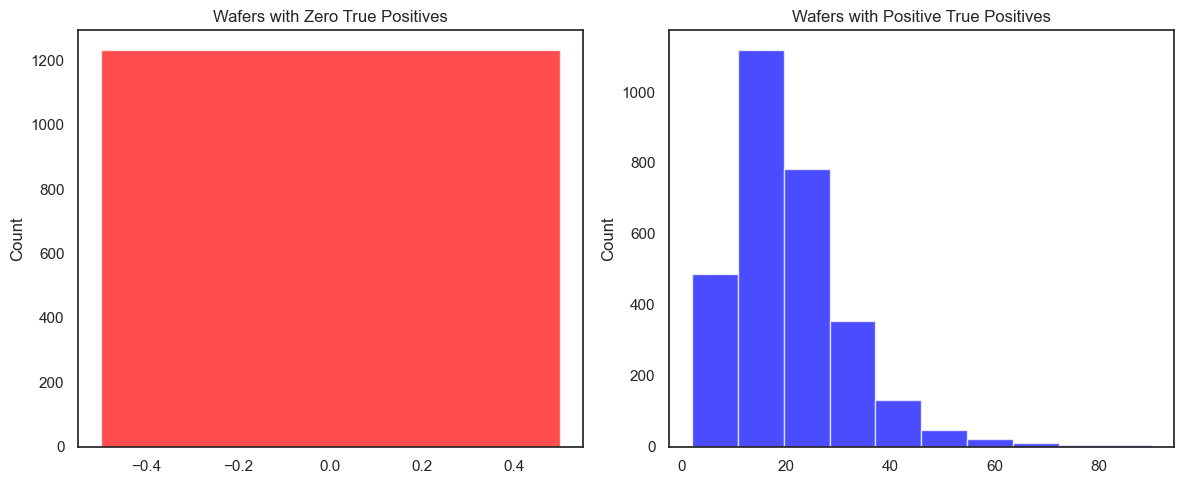

In [169]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot zeros
zeros = wafer_results_df[wafer_results_df['true_positives'] == 0]['true_positives']
ax1.hist(zeros, bins=1, color='red', alpha=0.7)
ax1.set_title('Wafers with Zero True Positives')
ax1.set_ylabel('Count')

# Plot positive values
positives = wafer_results_df[wafer_results_df['true_positives'] > 0]['true_positives']
ax2.hist(positives, bins=10, color='blue', alpha=0.7)
ax2.set_title('Wafers with Positive True Positives')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Histogram of Fasle Positives')

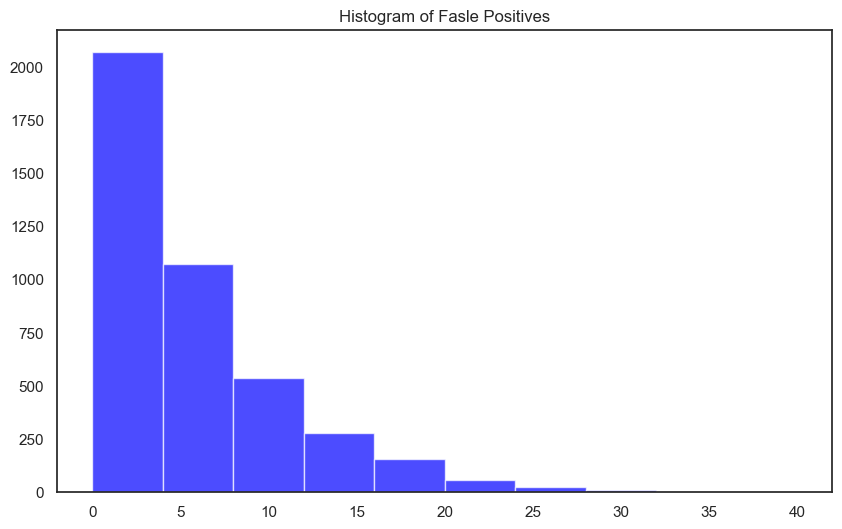

In [170]:
# plot - histogram of the  false_positives 
plt.figure(figsize=(10, 6))
plt.hist(wafer_results_df['false_positives'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Fasle Positives')

Text(0.5, 1.0, 'Histogram of false negatives')

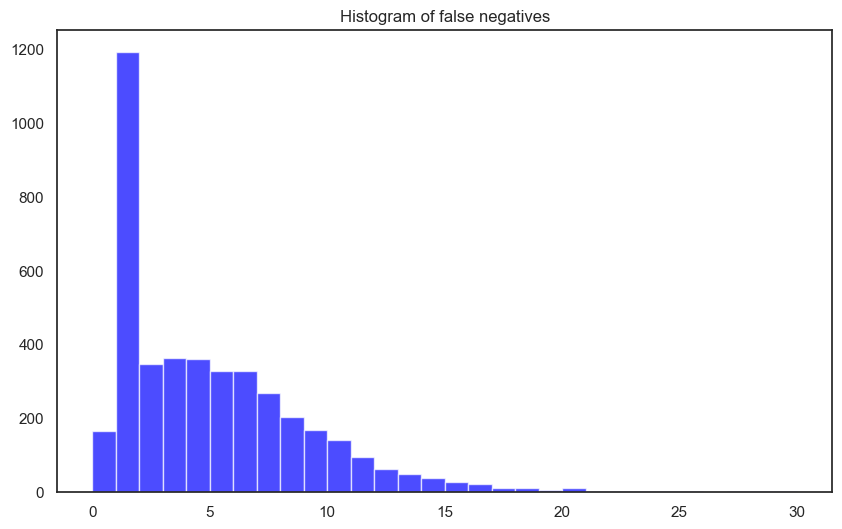

In [171]:
plt.figure(figsize=(10, 6))
plt.hist(wafer_results_df['false_negatives'], bins=30
, color='blue', alpha=0.7)
plt.title('Histogram of false negatives')

In [172]:
wafer

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
1169862,f3P9Pj,0,27,True,False
1169863,f3P9Pj,0,28,True,False
1169864,f3P9Pj,0,29,True,False
1169865,f3P9Pj,0,30,True,False
1169866,f3P9Pj,0,31,True,False
...,...,...,...,...,...
1173906,f3P9Pj,70,39,True,False
1173907,f3P9Pj,70,40,True,False
1173908,f3P9Pj,70,41,True,False
1173909,f3P9Pj,70,42,True,False


In [173]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**16/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        if len(wafer_df_list) == 1:
            fig, ax = plt.subplots(2, 1, figsize=(figsize, figsize*2))
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df_list[0], ax[idx2], map_type)
        else:
            fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
            for idx1, wafer_df in enumerate(wafer_df_list):
                for idx2, map_type in enumerate(['Input', 'Label']):
                    plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        if len(wafer_df_list) == 1:
            fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize))
            plot_wafer_map(wafer_df_list[0], ax, 'Input')
        else:
            fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
            for idx, wafer_df in enumerate(wafer_df_list):
                plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

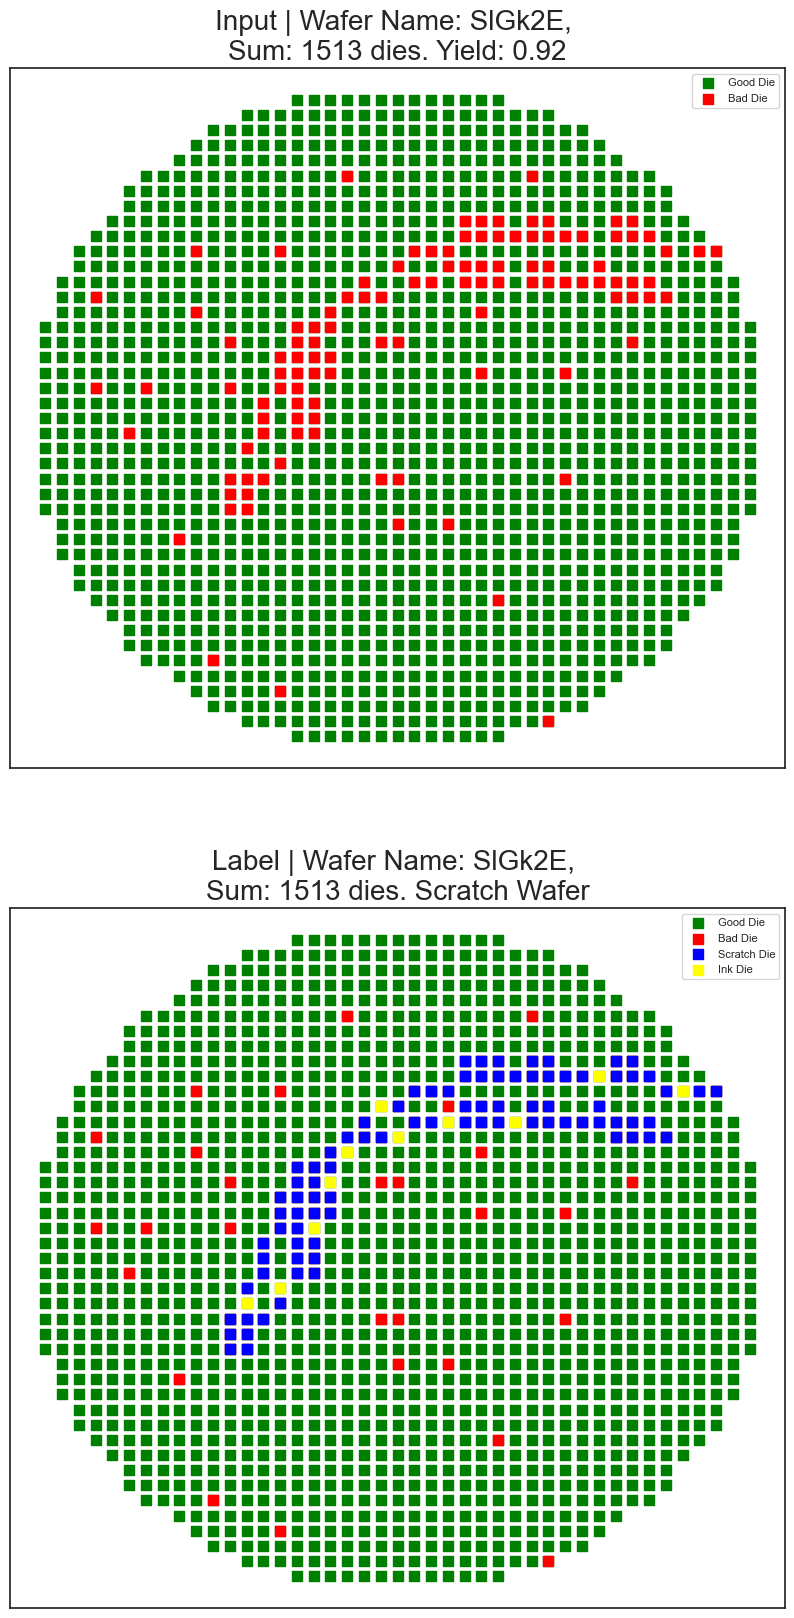

In [197]:
wafer = df_wafers[df_wafers['WaferName'] == 'SlGk2E']
plot_wafer_maps([wafer], figsize=10, labels=True)

In [198]:
print(f"Wafer Name: {wafer['WaferName'].iloc[0]}")
print(f"Yield Rate: {wafer['IsGoodDie'].mean():.2f}")   
print(f"Total Dies: {len(wafer)}")
print(f"Good Dies: {wafer['IsGoodDie'].sum()}")
print(f"Bad Dies: {len(wafer) - wafer['IsGoodDie'].sum()}")     
print(f"Scratch Dies: {wafer['IsScratchDie'].sum()}")
#sepcipic psicic metrixc per wafer from wafer_results_df
print(f"True Positives: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['true_positives'].values[0]}")
print(f"False Positives: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['false_positives'].values[0]}")
print(f"False Negatives: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['false_negatives'].values[0]}")
print(f"Precision: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['precision'].values[0]}")
print(f"Recall: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['recall'].values[0]}")
print(f"F1 Score: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['f1'].values[0]}")



Wafer Name: SlGk2E
Yield Rate: 0.92
Total Dies: 1513
Good Dies: 1399
Bad Dies: 114
Scratch Dies: 97
True Positives: 84.0
False Positives: 1.0
False Negatives: 13.0
Precision: 0.9882352941176471
Recall: 0.865979381443299
F1 Score: 0.9230769230769231


this soultion is much more computaionly intese, it has the potainl to do a better job detecting scratches and and the ink dies.

one way to omprove the process is to create an algorythem that does the inking - in its base inking is taking good dies as scrathed becasue there in the trajectory of the scrath - we can find such dies by finding what dies would connect close by connected components.

# NOTES TO MYSELF
- false scarthces - wafers with 1 bad die - is it really a scratch? 
- cinnecting between connected compunnets using bfs/a* 
- following the busines logic what is a low yeild? 
- add explantions for each parts and the results 
- add a pre process step to eliminate the one or two die in a wafer scartches


In [10]:
#TODO build your solution

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [11]:
#TODO add your thoughts

# Submission

In [ ]:
#TODO

#model = (...)
IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie

#TODO Fill in your name and email
name = 'FirstName LastName'
email = 'my_email@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)